In [1]:
library(tidyverse)

Warning message:
“Failed to locate timezone database”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
system.time(my_vcf <- read_tsv(file = '/srv/data/pass-rs-ue3/hg38-chr17-1kgenome/chr17_1kg.hg38_multianno.txt', n_max = 3e4, na = '.'))
system.time(my_meta <- read_tsv(file = 'ftp.1000genomes.ebi.ac.uk/vol1/ftp/data_collections/1000G_2504_high_coverage/20130606_g1k_3202_samples_ped_population.txt'))

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 30000 Columns: 2697
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2590): Ref, Alt, Func.refGene, Gene.refGene, GeneDetail.refGene, Exonic...
dbl   (95): Chr, Start, End, gnomAD_exome_ALL, gnomAD_exome_AFR, gnomAD_exom...
lgl   (12): mcap_score, mcap_sensitivity, FATHMM_pred, MetaSVM_pred, MetaLR_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


   user  system elapsed 
 15.498   2.822  15.748 

ERROR: Error: 'ftp.1000genomes.ebi.ac.uk/vol1/ftp/data_collections/1000G_2504_high_coverage/20130606_g1k_3202_samples_ped_population.txt' does not exist in current working directory ('/srv/home/abridiernahmias/pass_rs_ue3_bistats/biostats_2').


Timing stopped at: 0.007 0 0.007



In [ ]:
str(my_vcf)

In [ ]:
hist(my_vcf$AF_eas)
hist(my_vcf$AF_sas)

In [ ]:
sum(is.na(my_vcf$AF_eas))
sum(is.na(my_vcf$AF_sas))


In [ ]:
print(cor.test(x = my_vcf$AF_eas, y = my_vcf$AF_sas, method = 'pearson'))

print(cor.test(x = my_vcf$AF_eas, y = my_vcf$AF_sas, method = 'spearman'))

In [ ]:
print(cor.test(x = my_vcf$AF_eas, y = my_vcf$AF_afr, method = 'pearson'))

print(cor.test(x = my_vcf$AF_eas, y = my_vcf$AF_afr, method = 'spearman'))

In [ ]:
plot(x = my_vcf$AF_eas, y = my_vcf$AF_sas)

plot(x = rank(my_vcf$AF_eas), y = rank(my_vcf$AF_sas))

In [ ]:
plot(x = my_vcf$AF_eas, y = my_vcf$AF_afr)

plot(x = rank(my_vcf$AF_eas), y = rank(my_vcf$AF_afr))

In [ ]:
t.test(x = my_vcf$AF_eas, y = my_vcf$AF_sas, alternative = 'two.sided')

t.test(x = my_vcf$AF_eas, y = my_vcf$AF_afr, alternative = 'two.sided')



	Pearson's product-moment correlation

data:  my_vcf$AF_eas and my_vcf$DANN_score
t = -1.6761, df = 276, p-value = 0.09485
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.21547868  0.01746902
sample estimates:
       cor 
-0.1003803 


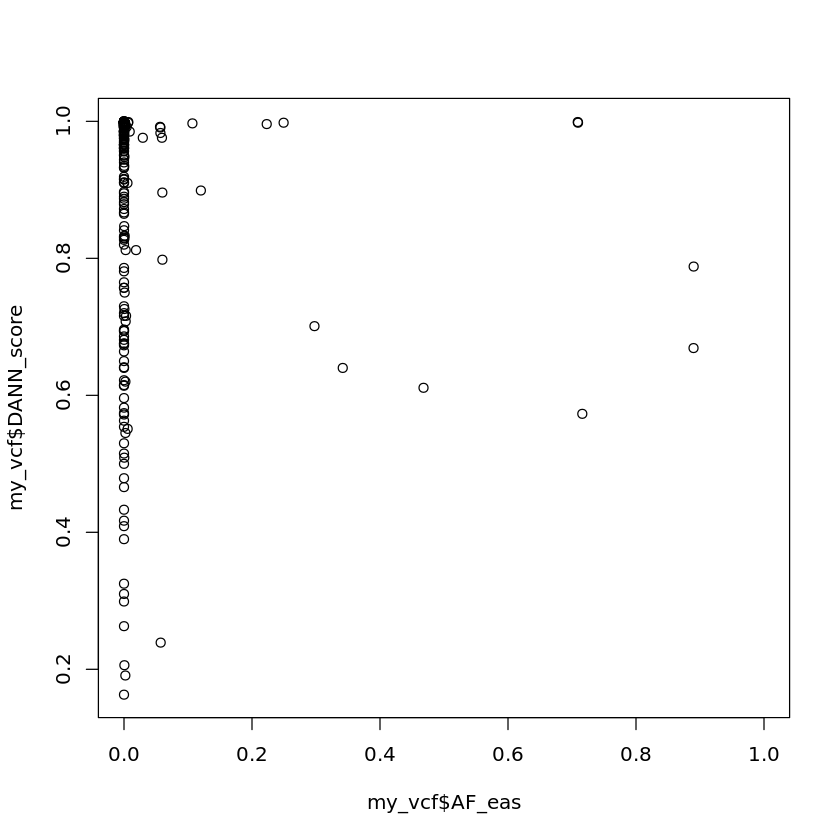

In [9]:
(cor.test(x = my_vcf$AF_eas, y = my_vcf$DANN_score, method = 'pearson'))
plot(x = my_vcf$AF_eas, y = my_vcf$DANN_score)